# TP FIFA 21

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno # pip install missingno (Il faut installer le package dans l'environnement python)

### 1. Chargement des données

In [3]:
df = pd.read_csv("../../data/movies.csv",low_memory=False)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


### 2. Nettoyage des données

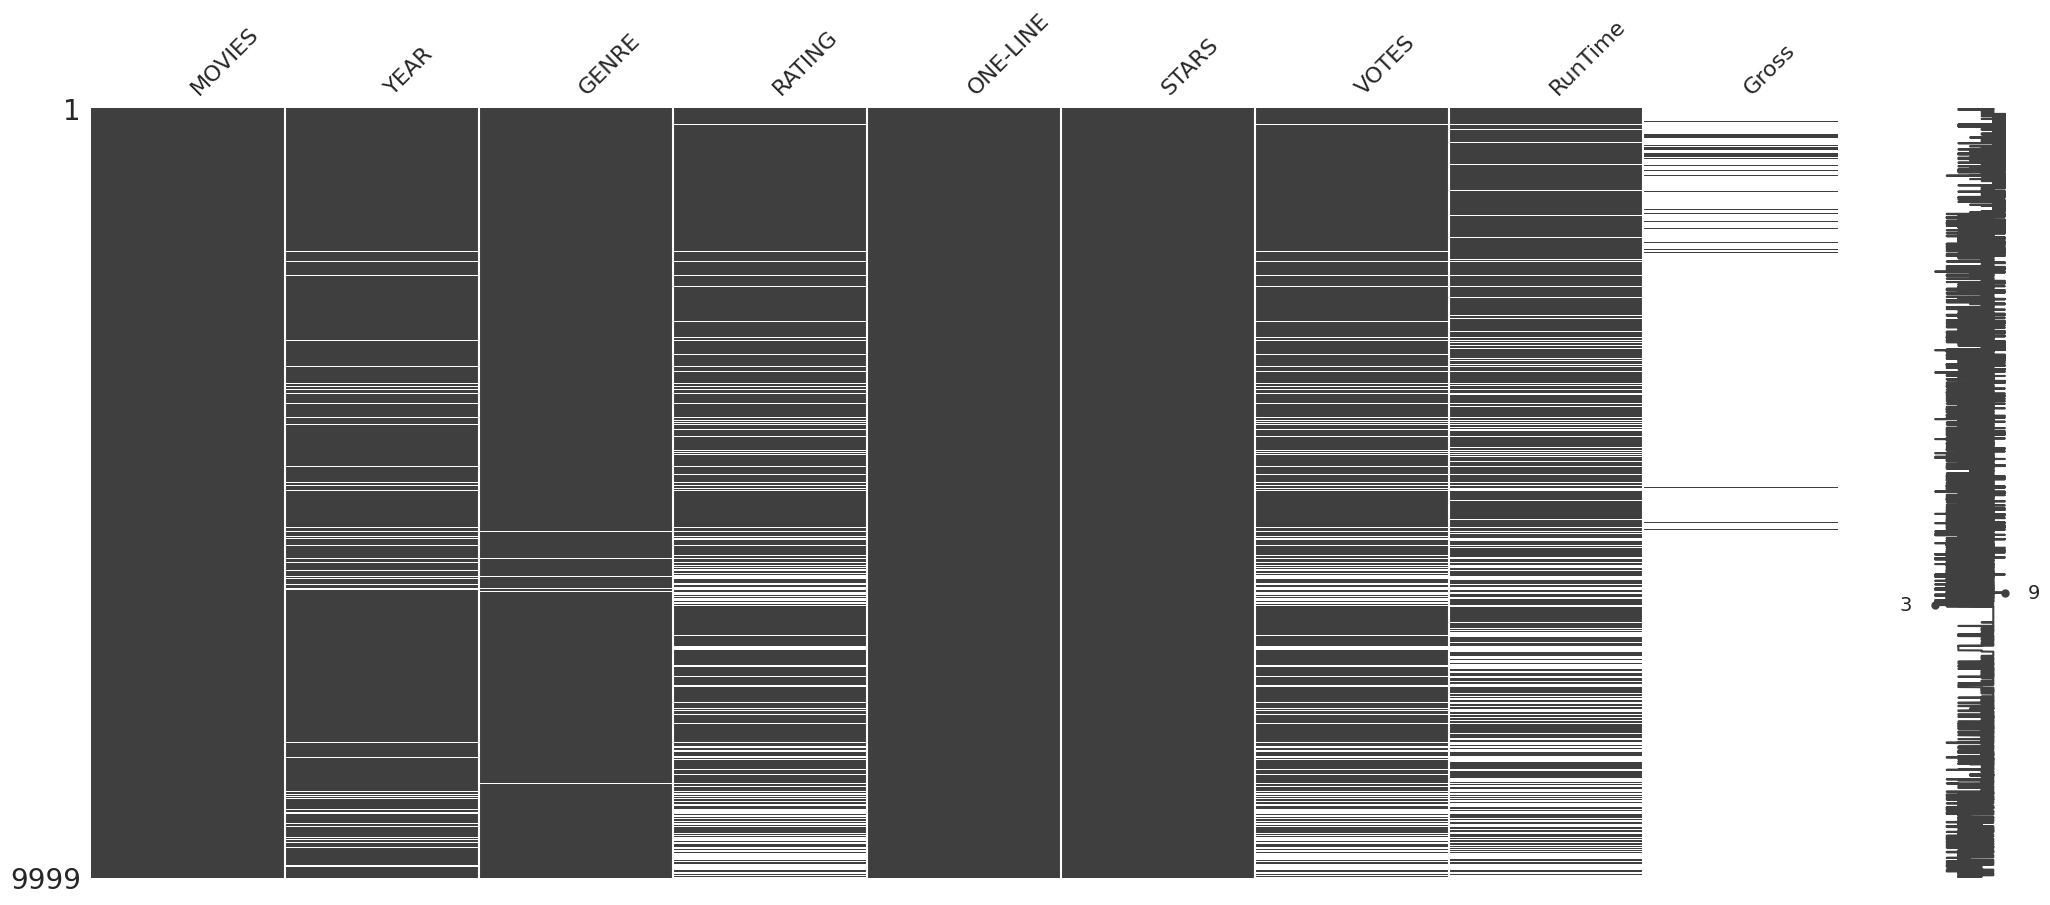

<Figure size 1500x900 with 0 Axes>

In [5]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

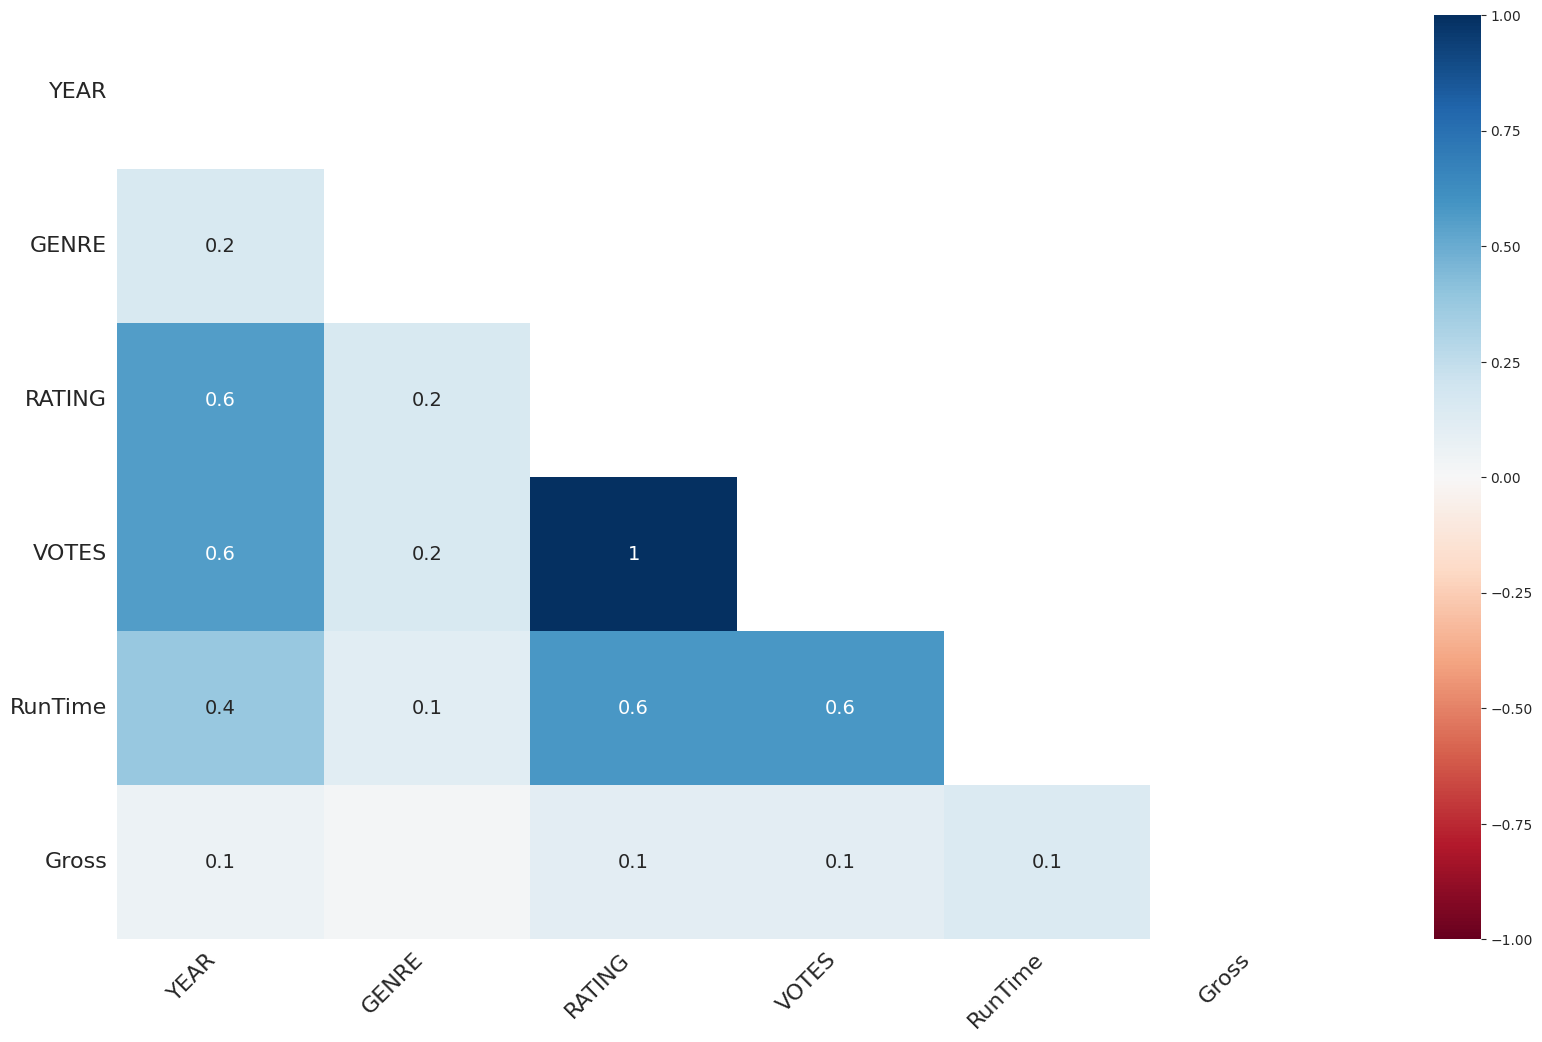

In [6]:
msno.heatmap(df, labels = True)


<Axes: >

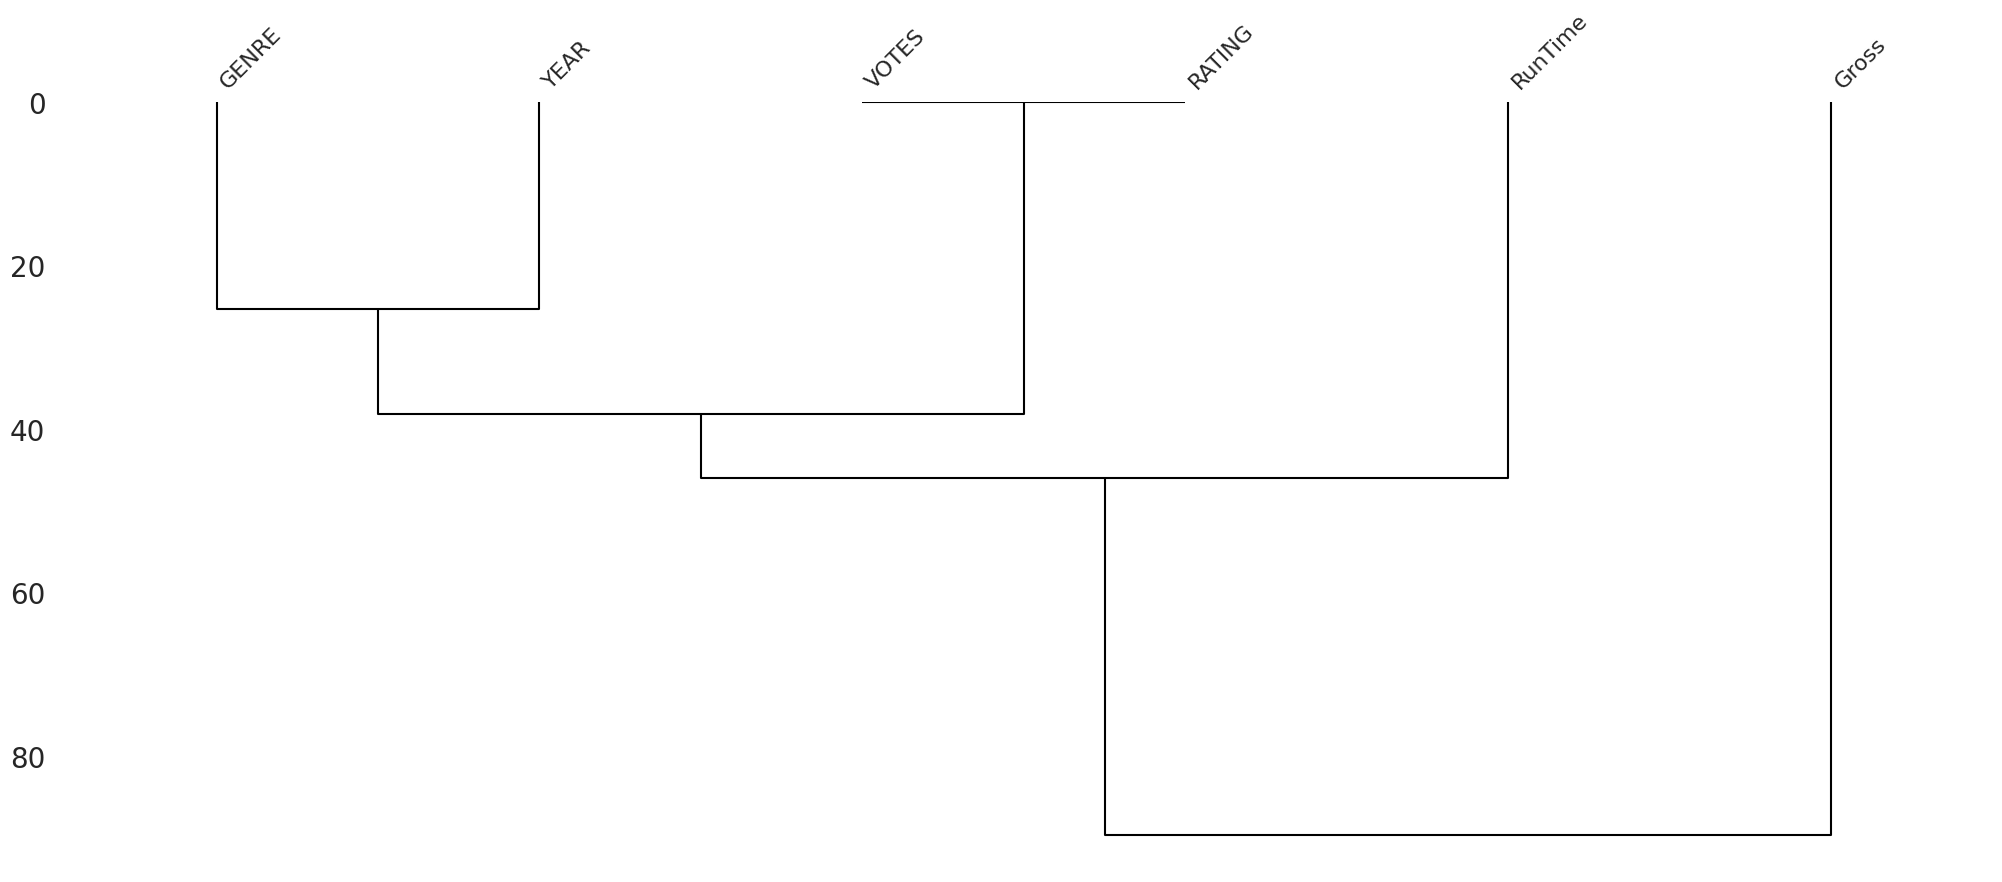

In [7]:
# Columns having missing values
missing_value_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
msno.dendrogram(df[missing_value_columns])

In [8]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_values_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_values_percent = {}
    for col in missing_values_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_values_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_values_percent

# method sum all missing values
def get_all_missing_values(df):
    total = 0
    for col in df.columns:
        total += df[col].isnull().sum()

    print("\nTotal Missing Values : {}".format(total))
    return total



In [9]:
missing_percent = get_numerical_summary(df)

YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)
RunTime : 2958 (29.583%)
Gross : 9539 (95.4%)


#### Suppression des données

Pour la suppression des données nous avons choisi la suppression des attributs

Le Threshold choisit est de 25% donc les attributs ayant plus de 25% de valeurs manquantes seront supprimés (Runtime et Gross) 

In [10]:
df_temp = df.copy()
# Seuil pour supprimer l'attribut dont les valeurs manquantes sont supérieures au seuil.
ATTRIBUTE_THRESHOLD = 25  #25% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis=1, inplace=True)
_ = get_numerical_summary(df_temp)


YEAR : 644 (6.441%)
GENRE : 80 (0.8%)
RATING : 1820 (18.202%)
VOTES : 1820 (18.202%)


In [11]:
from sklearn.impute import KNNImputer # (pip install sklearn)

df_temp = df.copy()

num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['RATING', 'RunTime']


In [12]:
# Initialisation KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

X = knn.transform(df_temp)

df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

del df_temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [13]:
cat_missing_cols = [col for col in missing_value_columns if df[col].dtype == 'object']
data_encoded = pd.get_dummies(df, columns=cat_missing_cols)
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 5414 entries, MOVIES to Gross_$97.69M
dtypes: bool(5409), float64(2), object(3)
memory usage: 52.0+ MB
None


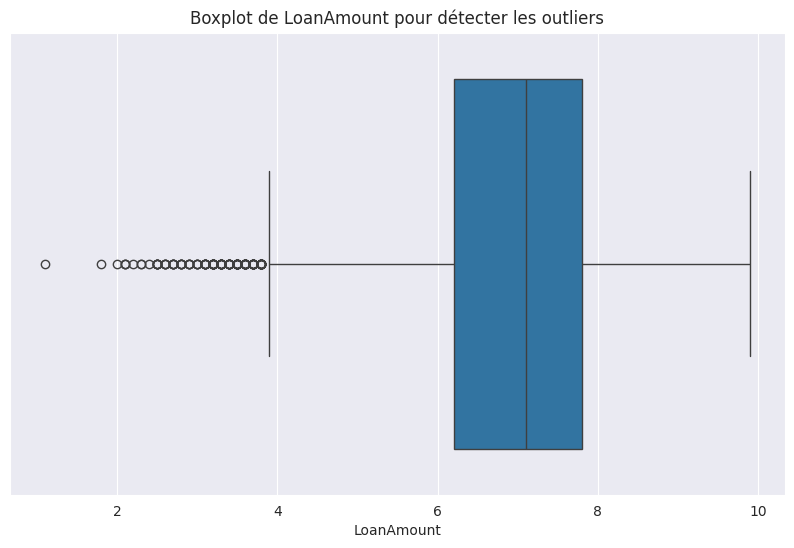

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df.RATING)
plt.title("Boxplot de LoanAmount pour détecter les outliers")
plt.xlabel("LoanAmount")
plt.show()

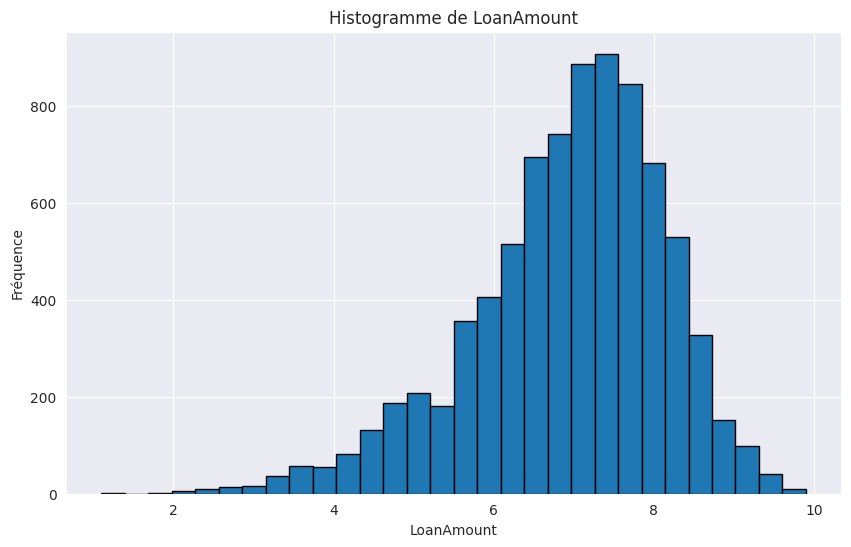

In [15]:
# Exemple d'Histogramme pour visualiser la distribution de 'LoanAmount'
plt.figure(figsize=(10, 6))
plt.hist(df.RATING, bins=30, edgecolor='black')
plt.title("Histogramme de LoanAmount")
plt.xlabel("LoanAmount")
plt.ylabel("Fréquence")
plt.show()

In [35]:
import numpy as np

df_per = df.RATING.value_counts(normalize=True).sort_values(ascending=False)
# print(df_per)

# the TOP 5
top_5 = df_per.index[:15]
print(top_5.sort_values(ascending=False))

df.loc[df.RATING < 4, 'RATING'] = np.random.choice(top_5, p=df_per.values)
df.loan_limit.value_counts()

Index([8.0, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7.0, 6.9, 6.8, 6.7, 6.6,
       6.5],
      dtype='float64', name='RATING')


ValueError: 'a' and 'p' must have same size